In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from re import sub
from sklearn import metrics

In [2]:
df_train=pd.read_csv("vehicle_data_train.csv")
pd.set_option("display.max_columns",None)

## Exploratory data analysis

In [3]:
df_train.sample(3)

,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
64814,64814,Bajaj RE 2010 Three,"Posted by Sajeewa on 2021-10-27 8:00 pm, Kurun...",Bajaj,RE,NaN,2010,Used,Manual,Three Wheel,Petrol,175,12345,Kurunegala,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/bajaj-re-sale-kurun...,Sajeewa,Member,2021-10-27 20:00:00,"Rs. 730,000"
33206,33206,Toyota Allion 260 2016 for sale,"Posted on 04 Mar 1:49 pm, Malabe, Colombo",Toyota,Allion,260,2016,Used,Automatic,Saloon,Petrol,"1,500 cc","52,000 km","Malabe, Colombo","Toyota Allion 260 2016Full option, Auto, TV DV...",https://ikman.lk/en/ad/toyota-allion-260-2016-...,Sell Fast | Nugegoda | Nayara Adds,Member,2022-03-04 13:49:00,"Rs 8,575,000"
78028,78028,Suzuki Alto Lxi 2007 for sale,"Posted on 08 Mar 1:00 pm, Mawathagama, Kurunegala",Suzuki,Alto,Lxi,2007,Used,Manual,Hatchback,Petrol,800 cc,"111,578 km","Mawathagama, Kurunegala",Suzuki alto Lxi2007 modleWine redACPower steer...,https://ikman.lk/en/ad/suzuki-alto-lxi-2007-fo...,Purasanda Enterprises,Member,2022-03-08 13:00:00,"Rs 2,375,000"


In [4]:
df_train.shape

(99176, 20)

In [5]:
df_train.isnull().sum()

Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 1
Edition           61191
Year                  0
Condition             0
Transmission          1
Body               4088
Fuel                  0
Capacity            160
Mileage               0
Location              0
Description       13001
Post_URL              0
Seller_name          78
Seller_type           0
published_date        0
Price                 0
dtype: int64

In [6]:
def EDA(column_name): 
            print(column_name.describe(),"\n")
            print("frequency:","\n",column_name.value_counts(),"\n")
            unique=list(pd.unique(column_name))
            unique.sort()
            print(len(unique))
            print(unique)

In [7]:
df_train.columns

Index(['Unnamed: 0', 'Title', 'Sub_title', 'Brand', 'Model', 'Edition', 'Year',
       'Condition', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Location', 'Description', 'Post_URL', 'Seller_name', 'Seller_type',
       'published_date', 'Price'],
      dtype='object')

In [8]:
#Title
# EDA(df_train["Title"])

In [9]:
#Sub_title
# EDA(df_train["Sub_title"])

In [10]:
#Brand
# EDA(df_train["Brand"])

In [11]:
#Model
# EDA(df_train["Model"])
#It is a mixture of float and string values

In [12]:
#Edition
# EDA(df_train["Edition"])

In [13]:
#Year
# EDA(df_train["Year"])
# sns.boxplot(x=df_train["Year"])

In [14]:
#Condition
# EDA(df_train["Condition"])

In [15]:
#Transmission
# print(EDA(df_train["Transmission"]))
# print(pd.unique(df_train["Transmission"]))

In [16]:
#Body
# print(EDA(df_train["Body"]))

In [17]:
# print(pd.unique(df_train["Body"]))

In [18]:
#Fuel
# EDA(df_train['Fuel'])

In [19]:
#Capacity
# EDA(df_train["Capacity"])

In [20]:
#Mileage
# EDA(df_train["Mileage"])

In [21]:
#Location
# EDA(df_train["Location"])

In [22]:
#Description
# EDA(df_train['Description'])

In [23]:
#Post_URL
# print(len(pd.unique(df_train["Post_URL"])))

In [24]:
#Seller_name
# EDA(df_train["Seller_name"])

In [25]:
#Seller_type
# EDA(df_train["Seller_type"])

In [26]:
#published_date
# EDA(df_train["published_date"])

In [27]:
#Price
# EDA(df_train["Price"])

## Feature Engineering

In [28]:
df_train.head()

,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
0,0,BMW X2 2018 for sale,"Posted on 14 Feb 4:51 pm, Nugegoda, Colombo",BMW,X2,NaN,2018,Used,Automatic,NaN,Petrol,"2,000 cc","8,000 km","Nugegoda, Colombo",ð 2018 MANUFACTUREð 2020 REGISTRATION ð...,https://ikman.lk/en/ad/bmw-x2-2018-for-sale-co...,Janith Kumarage,Premium-Member,2022-02-14 16:51:00,"Rs 21,500,000"
1,1,Bajaj Pulsar 135 2010,"Posted by Asa on 2021-09-30 7:14 am, Kandy",Bajaj,Pulsar 135,NaN,2010,Used,Automatic,Motorbike,Petrol,135,80000,Kandy,NaN,https://riyasewana.com/buy/bajaj-pulsar-135-sa...,Asa,Member,2021-09-30 07:14:00,"Rs. 129,000"
2,2,Micro Panda 2014,Posted by Asanga Wijeratne on 2021-09-17 1:17 ...,Micro,Panda,NaN,2014,Used,Manual,Car,Petrol,1000,93000,Nittambuwa,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/micro-panda-sale-ni...,Asanga Wijeratne,Member,2021-09-17 13:17:00,"Rs. 2,200,000"
3,3,Tata 207 Rx 2017,"Posted by Lalith Rohan on 2021-10-01 8:55 pm, ...",Tata,207 Rx,NaN,2017,Used,Manual,Pickup,Diesel,2550,28000,Anuradapura,"AIR CONDITION, POWER STEERING",https://riyasewana.com/buy/tata-207-rx-sale-an...,Lalith Rohan,Member,2021-10-01 20:55:00,"Rs. 2,325,000"
4,4,Toyota Land Cruiser Prado 2007 for sale,"Posted on 16 Jan 1:31 pm, Malabe, Colombo",Toyota,Land Cruiser Prado,2007,2007,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","135,000 km","Malabe, Colombo",Prado 120Full optionAutoLeather electricSunroo...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,CS Auto Mart,Premium-Member,2022-01-16 13:31:00,"Rs 14,950,000"


### Price

In [29]:
df_train["Price"]

0          Rs 21,500,000
1            Rs. 129,000
2          Rs. 2,200,000
3          Rs. 2,325,000
4          Rs 14,950,000
              ...       
99171      Rs. 1,650,000
99172      Rs. 6,950,000
99173       Rs 2,875,000
99174       Rs 4,950,000
99175     Rs. 61,250,000
Name: Price, Length: 99176, dtype: object

In [30]:
df_train["Price"].isnull().sum()

0

In [31]:
#deleting Negotiable data type
Price_Negotiable_indexes=df_train["Price"].loc[df_train["Price"]==' Negotiable'].index
df_train.drop(Price_Negotiable_indexes,axis=0,inplace=True)
df_train.reset_index(drop=True,inplace=True)

In [32]:
#Dealing with value types
edit_price_array=[]
for i in df_train["Price"].values:
    edit_price_array.append(int(sub(r'\D','',i)))
df_train_price_df=pd.DataFrame(edit_price_array,columns=["Price"])
df_train.drop(df_train[["Price"]],axis=1,inplace=True)
df_train=pd.concat([df_train,df_train_price_df],axis=1)

In [33]:
df_train.head()

,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
0,0,BMW X2 2018 for sale,"Posted on 14 Feb 4:51 pm, Nugegoda, Colombo",BMW,X2,NaN,2018,Used,Automatic,NaN,Petrol,"2,000 cc","8,000 km","Nugegoda, Colombo",ð 2018 MANUFACTUREð 2020 REGISTRATION ð...,https://ikman.lk/en/ad/bmw-x2-2018-for-sale-co...,Janith Kumarage,Premium-Member,2022-02-14 16:51:00,21500000
1,1,Bajaj Pulsar 135 2010,"Posted by Asa on 2021-09-30 7:14 am, Kandy",Bajaj,Pulsar 135,NaN,2010,Used,Automatic,Motorbike,Petrol,135,80000,Kandy,NaN,https://riyasewana.com/buy/bajaj-pulsar-135-sa...,Asa,Member,2021-09-30 07:14:00,129000
2,2,Micro Panda 2014,Posted by Asanga Wijeratne on 2021-09-17 1:17 ...,Micro,Panda,NaN,2014,Used,Manual,Car,Petrol,1000,93000,Nittambuwa,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/micro-panda-sale-ni...,Asanga Wijeratne,Member,2021-09-17 13:17:00,2200000
3,3,Tata 207 Rx 2017,"Posted by Lalith Rohan on 2021-10-01 8:55 pm, ...",Tata,207 Rx,NaN,2017,Used,Manual,Pickup,Diesel,2550,28000,Anuradapura,"AIR CONDITION, POWER STEERING",https://riyasewana.com/buy/tata-207-rx-sale-an...,Lalith Rohan,Member,2021-10-01 20:55:00,2325000
4,4,Toyota Land Cruiser Prado 2007 for sale,"Posted on 16 Jan 1:31 pm, Malabe, Colombo",Toyota,Land Cruiser Prado,2007,2007,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","135,000 km","Malabe, Colombo",Prado 120Full optionAutoLeather electricSunroo...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,CS Auto Mart,Premium-Member,2022-01-16 13:31:00,14950000


In [34]:
df_train.isnull().sum()

Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 1
Edition           56747
Year                  0
Condition             0
Transmission          1
Body               4088
Fuel                  0
Capacity            141
Mileage               0
Location              0
Description       12034
Post_URL              0
Seller_name          59
Seller_type           0
published_date        0
Price                 0
dtype: int64

### Brand

In [35]:
df_train["Brand"]

0               BMW
1             Bajaj
2             Micro
3              Tata
4            Toyota
            ...    
94727        Toyota
94728        Toyota
94729        Nissan
94730    Mitsubishi
94731         Honda
Name: Brand, Length: 94732, dtype: object

In [36]:
df_train['Brand'].isnull().sum()

0

In [37]:
brandxfrequency=list(df_train['Brand'].value_counts())
brandxfrequency.sort(reverse=False)
brandxfrequency_df=pd.DataFrame(brandxfrequency,columns=["Brand_frequency"])
brandxfrequency_df.describe()

,Brand_frequency
count,121.000000
mean,782.909091
std,2812.079598
min,1.000000
25%,10.000000
50%,60.000000
75%,236.000000
max,24225.000000


In [38]:
sns.boxplotx=(brandxfrequency)

Text(0, 0.5, 'number of brand types')

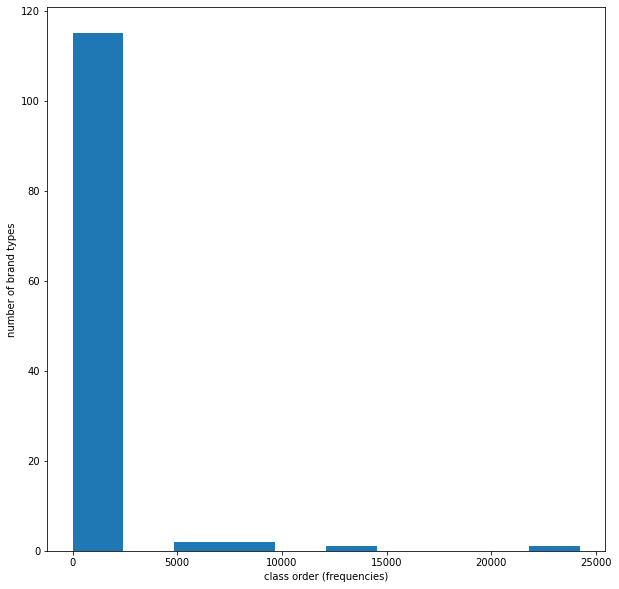

In [39]:
plt.figure(figsize=[10,10])
plt.hist(x=brandxfrequency)
plt.xlabel("class order (frequencies)")
plt.ylabel("number of brand types")

In [40]:
brandxfrequency

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 5,
 6,
 6,
 7,
 7,
 8,
 8,
 9,
 9,
 10,
 10,
 10,
 11,
 11,
 12,
 13,
 13,
 13,
 13,
 15,
 17,
 17,
 19,
 19,
 22,
 23,
 25,
 26,
 26,
 27,
 28,
 29,
 29,
 30,
 31,
 34,
 35,
 37,
 51,
 55,
 55,
 60,
 66,
 69,
 69,
 74,
 74,
 79,
 80,
 80,
 84,
 86,
 87,
 94,
 105,
 106,
 113,
 119,
 119,
 130,
 131,
 131,
 135,
 136,
 138,
 150,
 163,
 173,
 214,
 216,
 234,
 236,
 253,
 270,
 276,
 327,
 365,
 432,
 436,
 468,
 706,
 916,
 940,
 951,
 967,
 983,
 1043,
 1103,
 1236,
 1385,
 1530,
 1545,
 1684,
 1772,
 1783,
 1846,
 5101,
 6997,
 7310,
 9681,
 13581,
 24225]

In [41]:
#Choosing threshold as 1500

In [42]:
def filter_frequency(frequency_array,threshold):
    filtered_frequency=[]
    for i in frequency_array:
        if i>threshold:
            filtered_frequency.append(i)
    return filtered_frequency

In [43]:
filtered_brandxfrequency=filter_frequency(brandxfrequency,1500)
filtered_brandxfrequency

[1530, 1545, 1684, 1772, 1783, 1846, 5101, 6997, 7310, 9681, 13581, 24225]

In [44]:
def valuexfrequency_dict(unique_values,column):
    my_dict=dict()
    for i in unique_values:
        my_dict.update({i:column.loc[column==i].count()})
    return my_dict

In [45]:
brand_dict=valuexfrequency_dict(pd.unique(df_train["Brand"]),df_train["Brand"])

filtered_brand_dict=[]
for i in pd.unique(df_train["Brand"]):
    filtered_brand_dict.append(brand_dict.get(i))

In [46]:
filtered_brand_dict.sort(reverse=True)

In [47]:
filtered_brand_dict

[24225,
 13581,
 9681,
 7310,
 6997,
 5101,
 1846,
 1783,
 1772,
 1684,
 1545,
 1530,
 1385,
 1236,
 1103,
 1043,
 983,
 967,
 951,
 940,
 916,
 706,
 468,
 436,
 432,
 365,
 327,
 276,
 270,
 253,
 236,
 234,
 216,
 214,
 173,
 163,
 150,
 138,
 136,
 135,
 131,
 131,
 130,
 119,
 119,
 113,
 106,
 105,
 94,
 87,
 86,
 84,
 80,
 80,
 79,
 74,
 74,
 69,
 69,
 66,
 60,
 55,
 55,
 51,
 37,
 35,
 34,
 31,
 30,
 29,
 29,
 28,
 27,
 26,
 26,
 25,
 23,
 22,
 19,
 19,
 17,
 17,
 15,
 13,
 13,
 13,
 13,
 12,
 11,
 11,
 10,
 10,
 10,
 9,
 9,
 8,
 8,
 7,
 7,
 6,
 6,
 5,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [48]:
#Threshold of 1500

In [49]:
for i in pd.unique(df_train["Brand"]):
    if brand_dict.get(i) < 1500:
        df_train.drop(df_train.loc[df_train["Brand"]==i].index,axis=0,inplace=True)

In [50]:
df_train.shape

(77055, 20)

In [51]:
df_train.reset_index(drop=True,inplace=True)
pd.unique(df_train["Brand"])

array(['BMW', 'Bajaj', 'Micro', 'Tata', 'Toyota', 'Mitsubishi', 'Honda',
       'Nissan', 'Yamaha', 'TVS', 'Suzuki', 'Mercedes Benz'], dtype=object)

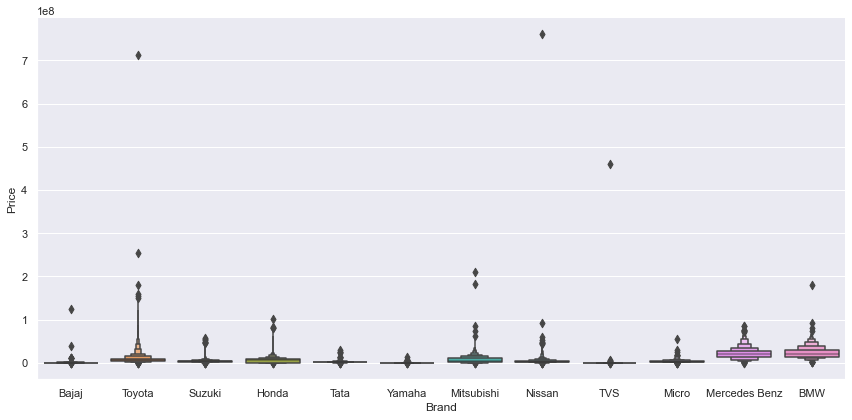

In [52]:
# Checking the hierarchieal order of Brand data types
sns.set()
sns.catplot(x="Brand",
            y="Price",data=df_train.sort_values("Price",ascending=True),
            kind="boxen",height=6,aspect=2)

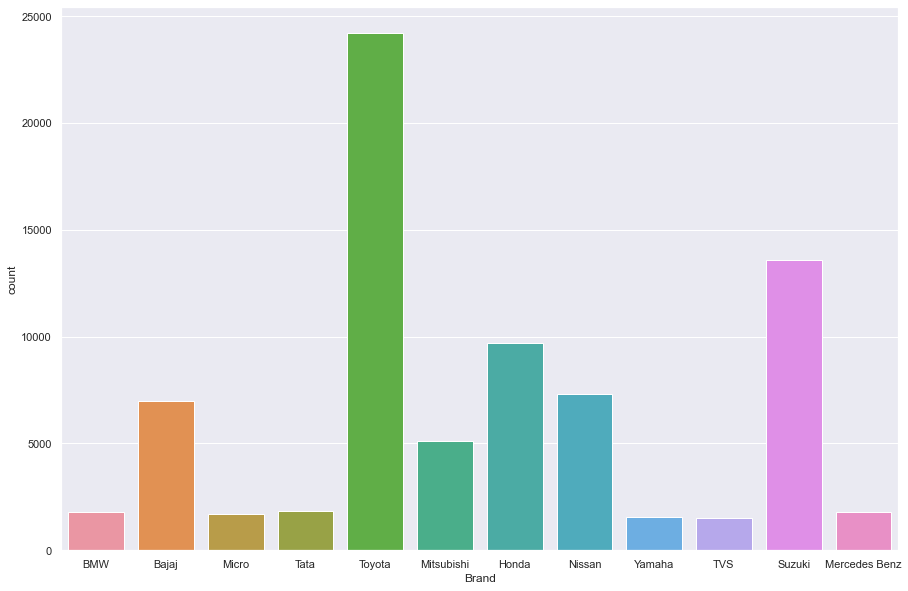

In [53]:
plt.figure(figsize=[15,10])
sns.countplot(x=df_train["Brand"])
plt.show()

In [54]:
def auto_accurate_label_encoding_reg(data_frame,column,label):
    my_dict=dict()
    j=1
    for i in pd.unique(data_frame[column]):
        df_i=df_train[label].loc[df_train[column]==i]
        i_median=df_i.median()
        my_dict.update({i:i_median+j})
        j=j+0.001
    median_price=np.array([])
    for i in my_dict:
        median_price=np.append(median_price,my_dict.get(i))
    median_price.sort()
    def get_key(val,dictionary):
        for key, value in dictionary.items():
            if val == value:
                return key
    v=1
    for i in median_price:
        data_frame[column].replace(get_key(i,my_dict),v,inplace=True)
        v=v+1
    return data_frame

In [55]:
df_train=auto_accurate_label_encoding_reg(df_train,"Brand","Price")

In [56]:
df_train.head()

,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
0,0,BMW X2 2018 for sale,"Posted on 14 Feb 4:51 pm, Nugegoda, Colombo",11,X2,NaN,2018,Used,Automatic,NaN,Petrol,"2,000 cc","8,000 km","Nugegoda, Colombo",ð 2018 MANUFACTUREð 2020 REGISTRATION ð...,https://ikman.lk/en/ad/bmw-x2-2018-for-sale-co...,Janith Kumarage,Premium-Member,2022-02-14 16:51:00,21500000
1,1,Bajaj Pulsar 135 2010,"Posted by Asa on 2021-09-30 7:14 am, Kandy",2,Pulsar 135,NaN,2010,Used,Automatic,Motorbike,Petrol,135,80000,Kandy,NaN,https://riyasewana.com/buy/bajaj-pulsar-135-sa...,Asa,Member,2021-09-30 07:14:00,129000
2,2,Micro Panda 2014,Posted by Asanga Wijeratne on 2021-09-17 1:17 ...,5,Panda,NaN,2014,Used,Manual,Car,Petrol,1000,93000,Nittambuwa,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/micro-panda-sale-ni...,Asanga Wijeratne,Member,2021-09-17 13:17:00,2200000
3,3,Tata 207 Rx 2017,"Posted by Lalith Rohan on 2021-10-01 8:55 pm, ...",4,207 Rx,NaN,2017,Used,Manual,Pickup,Diesel,2550,28000,Anuradapura,"AIR CONDITION, POWER STEERING",https://riyasewana.com/buy/tata-207-rx-sale-an...,Lalith Rohan,Member,2021-10-01 20:55:00,2325000
4,4,Toyota Land Cruiser Prado 2007 for sale,"Posted on 16 Jan 1:31 pm, Malabe, Colombo",10,Land Cruiser Prado,2007,2007,Used,Automatic,SUV / 4x4,Petrol,"2,700 cc","135,000 km","Malabe, Colombo",Prado 120Full optionAutoLeather electricSunroo...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,CS Auto Mart,Premium-Member,2022-01-16 13:31:00,14950000


### Fuel

In [57]:
df_train["Fuel"]

0        Petrol
1        Petrol
2        Petrol
3        Diesel
4        Petrol
          ...  
77050    Diesel
77051    Hybrid
77052    Petrol
77053    Diesel
77054    Petrol
Name: Fuel, Length: 77055, dtype: object

In [58]:
#Keeping only diesel, hybrid and petrol
fuel_remove=['CNG','Electric', 'Gas','Kick', 'Kick / Electric', 
             'Other fuel type']
fuel_remove_indexes=[]
for i in fuel_remove:
    index=df_train[df_train["Fuel"]==i].index
    fuel_remove_indexes.append(index)

In [59]:
for i in fuel_remove_indexes:
    df_train.drop(i,axis=0,inplace=True)

In [60]:
df_train.reset_index(drop=True,inplace=True)

In [61]:
df_train["Fuel"].value_counts()

Petrol    55052
Diesel    10922
Hybrid    10605
Name: Fuel, dtype: int64

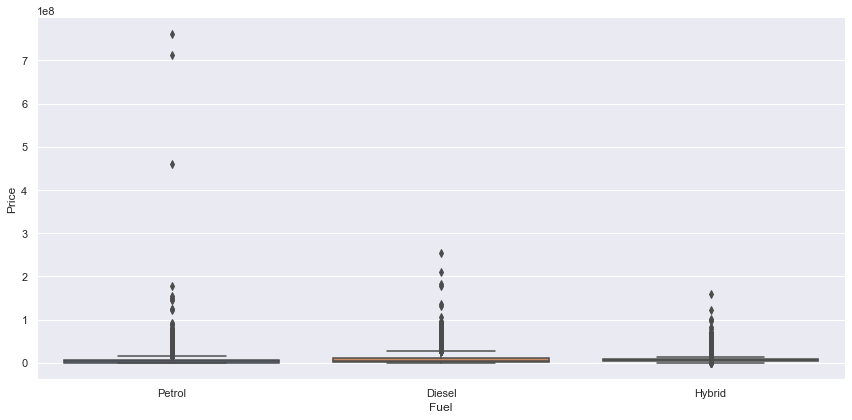

In [62]:
#Seeing the relationship betwen fuel data types and price
sns.set()
sns.catplot(x="Fuel",y="Price",data=df_train.sort_values("Price",ascending=True),
           kind="box",height=6,aspect=2)

In [63]:
df_train=auto_accurate_label_encoding_reg(df_train,"Fuel","Price")

In [64]:
df_train.head()

,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
0,0,BMW X2 2018 for sale,"Posted on 14 Feb 4:51 pm, Nugegoda, Colombo",11,X2,NaN,2018,Used,Automatic,NaN,1,"2,000 cc","8,000 km","Nugegoda, Colombo",ð 2018 MANUFACTUREð 2020 REGISTRATION ð...,https://ikman.lk/en/ad/bmw-x2-2018-for-sale-co...,Janith Kumarage,Premium-Member,2022-02-14 16:51:00,21500000
1,1,Bajaj Pulsar 135 2010,"Posted by Asa on 2021-09-30 7:14 am, Kandy",2,Pulsar 135,NaN,2010,Used,Automatic,Motorbike,1,135,80000,Kandy,NaN,https://riyasewana.com/buy/bajaj-pulsar-135-sa...,Asa,Member,2021-09-30 07:14:00,129000
2,2,Micro Panda 2014,Posted by Asanga Wijeratne on 2021-09-17 1:17 ...,5,Panda,NaN,2014,Used,Manual,Car,1,1000,93000,Nittambuwa,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/micro-panda-sale-ni...,Asanga Wijeratne,Member,2021-09-17 13:17:00,2200000
3,3,Tata 207 Rx 2017,"Posted by Lalith Rohan on 2021-10-01 8:55 pm, ...",4,207 Rx,NaN,2017,Used,Manual,Pickup,2,2550,28000,Anuradapura,"AIR CONDITION, POWER STEERING",https://riyasewana.com/buy/tata-207-rx-sale-an...,Lalith Rohan,Member,2021-10-01 20:55:00,2325000
4,4,Toyota Land Cruiser Prado 2007 for sale,"Posted on 16 Jan 1:31 pm, Malabe, Colombo",10,Land Cruiser Prado,2007,2007,Used,Automatic,SUV / 4x4,1,"2,700 cc","135,000 km","Malabe, Colombo",Prado 120Full optionAutoLeather electricSunroo...,https://ikman.lk/en/ad/toyota-land-cruiser-pra...,CS Auto Mart,Premium-Member,2022-01-16 13:31:00,14950000


### Year

In [65]:
pd.unique(df_train["Year"])

array([2018, 2010, 2014, 2017, 2007, 2012, 2002, 1983, 2019, 2011, 2015,
       1982, 1999, 2013, 2016, 1992, 2003, 2008, 2000, 1994, 2006, 1981,
       1990, 2005, 1997, 1969, 1985, 2009, 2004, 2001, 1991, 2020, 1996,
       1989, 1998, 1993, 1979, 1995, 1977, 1980, 1986, 1987, 1988, 1984,
       2021, 1975, 1976, 1974, 1968, 1978, 1973, 1900, 1967, 1971, 1972,
       1970, 1965, 1966,    0, 1963, 1952, 1948, 1922, 1957, 1956, 1955,
       1960, 2561, 1936, 1964], dtype=int64)

In [66]:
Year_unique=list(pd.unique(df_train["Year"]))
Year_unique.sort(reverse=True)

In [67]:
# Year_unique

In [68]:
# valuexfrequency_dict(Year_unique,df_train["Year"])

In [69]:
filter_Year_values=[ 2561,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,
                    2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990,
                    1989,1988,1987,1986,1985,1984,1983,1982,1981,1980,1979,
                    1978,1977,1976,1975,1974,1973,1972,1971,1970,1969,1968,
                    1967,1966,1965,1964,1963,1960,1956,1955,1952,1948,1936,1922,1900,0,]

In [70]:
def remove_column_value_points(value_points,column,dataframe):
    value_point_indexes=[]
    for i in value_points:
        i_index=dataframe[column==i].index
        value_point_indexes.append(i_index)
    for i in value_point_indexes:
        dataframe.drop(i,axis=0,inplace=True)
    return dataframe

In [71]:
df_train=remove_column_value_points(filter_Year_values,df_train["Year"],df_train)

In [72]:
df_train["Year"].value_counts()

2015    7687
2017    7374
2018    6533
2014    5261
2016    5214
2013    3976
2012    3483
2011    2953
2019    2740
2020    1056
2021      64
1957       1
Name: Year, dtype: int64

In [73]:
df_train.reset_index(drop=True,inplace=True)

In [74]:
def Year_optimize(column,dataframe,current_year):
    df_year=[]
    for i in dataframe[column].values:
        year_value= i - current_year
        df_year.append(year_value)
    df_year=np.array(df_year)
    df_year=pd.DataFrame(df_year,columns=["Year"])
    dataframe.drop(column,axis=1,inplace=True)
    dataframe=pd.concat([df_year,dataframe],axis=1)
    return dataframe

In [75]:
df_train=Year_optimize("Year",df_train,2022)

In [76]:
df_train.isnull().sum()

Year                  0
Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 1
Edition           26036
Condition             0
Transmission          0
Body               2319
Fuel                  0
Capacity             74
Mileage               0
Location              0
Description        7231
Post_URL              0
Seller_name          29
Seller_type           0
published_date        0
Price                 0
dtype: int64

In [77]:
df_train.shape

(46342, 20)

### Condition

In [78]:
pd.unique(df_train["Condition"])

array(['Used', 'Reconditioned', 'New', 'Recondition', 'e'], dtype=object)

In [79]:
#replacing "Recondition" to "Reconditioned"
df_train['Condition'] = df_train['Condition'].replace(['Recondition'],'Reconditioned')

In [80]:
#deleting e data type
Condition_e_indexes=df_train["Condition"].loc[df_train["Condition"]=='e'].index
df_train.drop(Condition_e_indexes,axis=0,inplace=True)
df_train.reset_index(drop=True,inplace=True)

In [81]:
df_train["Condition"].value_counts()

Used             44890
Reconditioned     1056
New                316
Name: Condition, dtype: int64

In [82]:
def drop_valuetype_column(column,value_type_name,dataframe):
    value_indexes= dataframe[column].loc[dataframe[column]==value_type].index
    dataframe.drop(value_indexes,axis=0,inplace=True)
    dataframe.reset_index(drop=True,inplace=True)

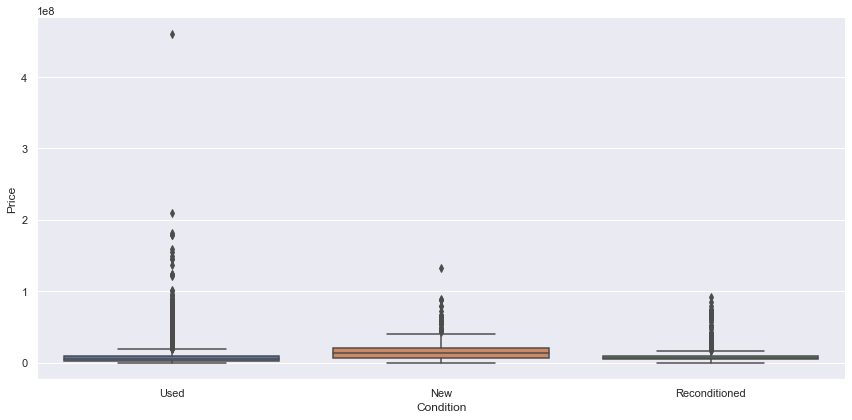

In [83]:
#Checking the relationship of value types with price
sns.catplot(x="Condition",y="Price", data=df_train.sort_values("Price",ascending=False)
           ,kind="box",height=6,aspect=2)

In [84]:
#Using domain knowledge and catplot:
'''
Used:0
Reconditioned: 1
New: 2
'''

'\nUsed:0\nReconditioned: 1\nNew: 2\n'

In [85]:
#Using label encoding
df_train["Condition"]=df_train["Condition"].replace(['Used', 'Reconditioned', 'New'],[0,1,2])

### Transmission

In [86]:
pd.unique(df_train["Transmission"])

array(['Automatic', 'Manual', 'Tiptronic', 'Other transmission'],
      dtype=object)

In [87]:
#Deleting 'Other transmission'
def replace_valuetype_column(column,value_type_name,dataframe):
    value_indexes= dataframe[column].loc[dataframe[column]==value_type_name].index
    dataframe.drop(value_indexes,axis=0,inplace=True)
    dataframe.reset_index(drop=True,inplace=True)
replace_valuetype_column("Transmission","Other transmission",df_train)

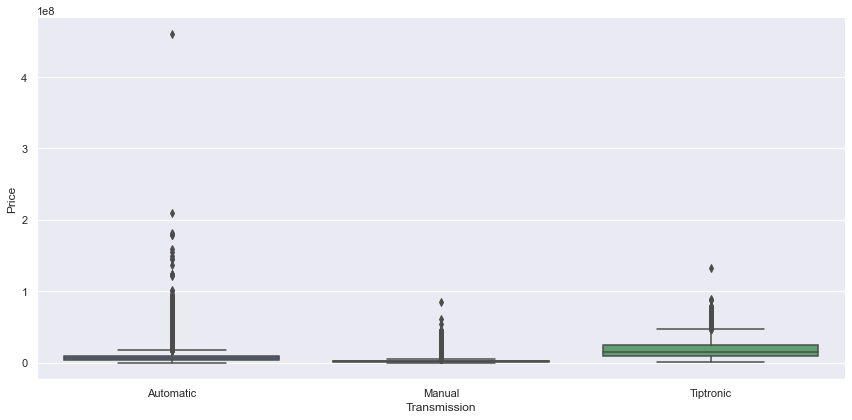

In [88]:
#Checking the relationship of value types with price
sns.catplot(x="Transmission",y="Price", data=df_train.sort_values("Price",ascending=True)
           ,kind="box",height=6,aspect=2)

In [89]:
# Using label encoding
'''
Manual: 0
Automatic: 1
Tiptronic: 2
'''

'\nManual: 0\nAutomatic: 1\nTiptronic: 2\n'

In [90]:
df_train["Transmission"]=df_train["Transmission"].replace(["Manual","Automatic","Tiptronic"],[0,1,2])

In [91]:
df_train["Transmission"].value_counts()

1    35925
0     7914
2     2412
Name: Transmission, dtype: int64

### Body

In [92]:
df_train.isnull().sum()

Year                  0
Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 1
Edition           25953
Condition             0
Transmission          0
Body               2318
Fuel                  0
Capacity             73
Mileage               0
Location              0
Description        7189
Post_URL              0
Seller_name          29
Seller_type           0
published_date        0
Price                 0
dtype: int64

In [93]:
df_train["Body"]=df_train["Body"].fillna('Car')

In [94]:
df_train.isnull().sum()

Year                  0
Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 1
Edition           25953
Condition             0
Transmission          0
Body                  0
Fuel                  0
Capacity             73
Mileage               0
Location              0
Description        7189
Post_URL              0
Seller_name          29
Seller_type           0
published_date        0
Price                 0
dtype: int64

In [95]:
Bodyxfrequency=list(df_train['Body'].value_counts())
Bodyxfrequency.sort(reverse=False)
Bodyxfrequency_df=pd.DataFrame(Bodyxfrequency,columns=["Body_frequency"])
Bodyxfrequency_df.describe()

,Body_frequency
count,20.00000
mean,2312.55000
std,3556.56883
min,2.00000
25%,125.50000
50%,561.50000
75%,2376.50000
max,11018.00000


In [96]:
Bodyxfrequency

[2,
 3,
 5,
 16,
 115,
 129,
 216,
 226,
 229,
 356,
 767,
 875,
 953,
 1333,
 1605,
 4691,
 6258,
 7071,
 10383,
 11018]

<AxesSubplot:>

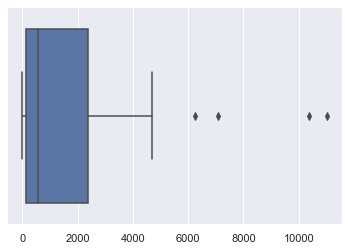

In [97]:
sns.boxplot(x=Bodyxfrequency)

Text(0, 0.5, 'number of Body value types')

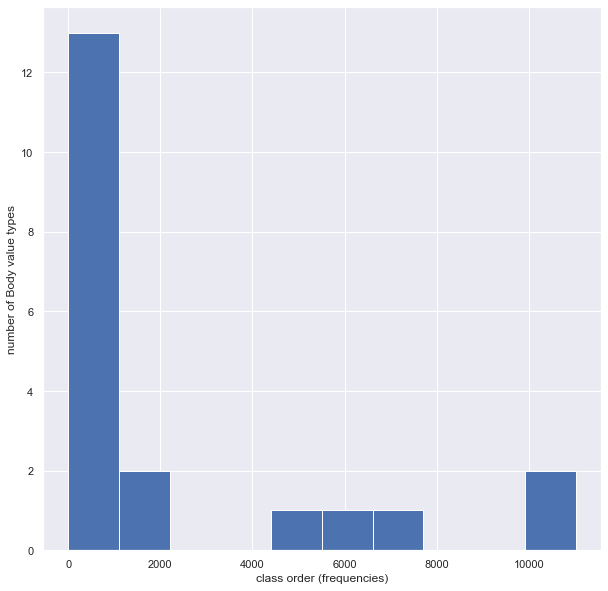

In [98]:
plt.figure(figsize=[10,10])
plt.hist(x=Bodyxfrequency)
plt.xlabel("class order (frequencies)")
plt.ylabel("number of Body value types")

In [99]:
#Choosing threshold frequency 1500

In [100]:
filtered_bodyxfrequency=filter_frequency(Bodyxfrequency,1500)
filtered_bodyxfrequency

[1605, 4691, 6258, 7071, 10383, 11018]

In [101]:
body_dict=valuexfrequency_dict(pd.unique(df_train["Body"]),df_train["Body"])

filtered_body_dict=[]
for i in pd.unique(df_train["Body"]):
    filtered_body_dict.append(body_dict.get(i))
filtered_body_dict.sort(reverse=True)
filtered_body_dict

[11018,
 10383,
 7071,
 6258,
 4691,
 1605,
 1333,
 953,
 875,
 767,
 356,
 229,
 226,
 216,
 129,
 115,
 16,
 5,
 3,
 2]

In [102]:
#Threshold of 1500

In [103]:
for i in pd.unique(df_train["Body"]):
    if body_dict.get(i) < 1500:
        df_train.drop(df_train.loc[df_train["Body"]==i].index,axis=0,inplace=True)

In [104]:
pd.unique(df_train["Body"])

array(['Car', 'SUV / 4x4', 'Motorbike', 'Hatchback', 'Saloon',
       'Three Wheel'], dtype=object)

In [105]:
#Removing data types not in these:

In [106]:
filtered_body_dict_complement=['MPV','Van', 'Station wagon', 'Lorry',
       'Unregistered', 'Pickup', 'Convertible', 'Bus', 'CoupÃ©/Sports',
       'Heavy-Duty', 'Wagon', 'Cab', 'Tractor']

In [107]:
#Deleting data types in filtered_brand_dict_complement
df_train_body_=df_train[["Body"]]
body_outlier_indexes=[]
for i in filtered_body_dict_complement:
    indexes_outliers=(df_train_body_[df_train_body_["Body"]==i]).index
    body_outlier_indexes.append(indexes_outliers)

for i in body_outlier_indexes:
    df_train.drop(i,axis=0,inplace=True)

In [108]:
df_train["Body"].value_counts()

Hatchback      11018
Car            10383
Motorbike       7071
Saloon          6258
SUV / 4x4       4691
Three Wheel     1605
Name: Body, dtype: int64

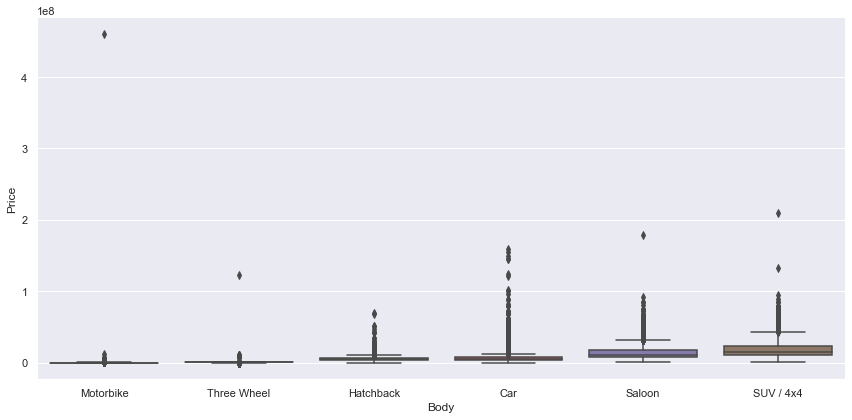

In [109]:
sns.catplot(x="Body", y="Price",
            data=df_train.sort_values("Price",ascending=True)
           ,kind="box",height=6,aspect=2)

In [110]:
pd.unique(df_train["Body"])

array(['Car', 'SUV / 4x4', 'Motorbike', 'Hatchback', 'Saloon',
       'Three Wheel'], dtype=object)

In [111]:
#Label Encoding

In [112]:
df_train=auto_accurate_label_encoding_reg(df_train,"Body","Price")

In [113]:
df_train.head()

,Year,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
0,-4,0,BMW X2 2018 for sale,"Posted on 14 Feb 4:51 pm, Nugegoda, Colombo",11,X2,NaN,0,1,4,1,"2,000 cc","8,000 km","Nugegoda, Colombo",ð 2018 MANUFACTUREð 2020 REGISTRATION ð...,https://ikman.lk/en/ad/bmw-x2-2018-for-sale-co...,Janith Kumarage,Premium-Member,2022-02-14 16:51:00,21500000
1,-8,2,Micro Panda 2014,Posted by Asanga Wijeratne on 2021-09-17 1:17 ...,5,Panda,NaN,0,0,4,1,1000,93000,Nittambuwa,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/micro-panda-sale-ni...,Asanga Wijeratne,Member,2021-09-17 13:17:00,2200000
3,-10,5,Toyota Land Cruiser Sahara ZX 2012 for sale,"Posted on 20 Jun 10:46 am, Kottawa, Colombo",10,Land Cruiser Sahara,ZX,0,2,6,1,"4,800 cc","115,000 km","Kottawa, Colombo",( KS-5XXX )Toyota Lanka maintained vehicle in ...,https://ikman.lk/en/ad/toyota-land-cruiser-sah...,Heshan,Premium-Member,2022-06-20 10:46:00,29800000
4,-5,6,Toyota VITZ 2017,"Posted by DENVER on 2021-09-19 10:50 pm, Ragama",10,VITZ,NaN,0,1,4,1,1000,49500,Ragama,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-vitz-sale-ra...,DENVER,Member,2021-09-19 22:50:00,7590000
5,-8,8,Honda Vezel X SUV 2014 for sale,"Posted on 30 Oct 7:46 am, Matara City, Matara",9,Vezel,X SUV,0,1,6,3,"1,500 cc","145,000 km","Matara City, Matara",âï¸Honda Vezel âï¸âï¸EXPECTING PRICE...,https://ikman.lk/en/ad/honda-vezel-x-suv-2014-...,Lucky Enterprises,Premium-Member,2022-10-30 07:46:00,8200000


### Capacity

In [114]:
df_train["Capacity"].tail()

46245         998
46246    1,990 cc
46248         650
46249        1500
46250        1500
Name: Capacity, dtype: object

In [115]:
df_train=df_train[df_train["Capacity"].notna()]

In [116]:
df_train["Capacity"].values

array(['2,000 cc', '1000', '4,800 cc', ..., '650', '1500', '1500'],
      dtype=object)

In [117]:
# remove_indexes=(df_train[df_train["Capacity"]=="-"]).index
# df_train.drop(remove_indexes,axis=0,inplace=True)
# df_train.reset_index(drop=True,inplace=True)

In [118]:
outlier=["-","Manual","Automatic"]
for i in outlier:
    df_train=df_train[df_train["Capacity"]!=i]
df_train.reset_index(drop=True,inplace=True)

In [119]:
pd.unique(df_train["Capacity"])

array(['2,000 cc', '1000', '4,800 cc', '1,500 cc', '150', '1300', '100',
       '110', '1,000 cc', '650 cc', '205', '650', '1,790 cc', '800 cc',
       '1500', '125', '1,400 cc', '3,000 cc', '2,993 cc', '1,300 cc',
       '1,200 cc', '2,700 cc', '3,200 cc', '1,998 cc', '800', '1496', '0',
       '1,600 cc', '180', '660 cc', '200', '225', '2,500 cc', '135',
       '1,499 cc', '1,990 cc', '2,200 cc', '1,798 cc', '1,800 cc',
       '1,490 cc', '600 cc', '2,990 cc', '660', '215', '2,800 cc',
       '3,500 cc', '90', '160', '4,200 cc', '149', '990', '2,982 cc',
       '990 cc', '1,496 cc', '796', '1,290 cc', '198', '1,350 cc', '175',
       '1,330 cc', '1,650 cc', '1490', '1790', '1,390 cc', '155', '113',
       '2,150 cc', '858 cc', '2,143 cc', '2,980 cc', '4,461 cc', '1800',
       '134', '1,075 cc', '70', '99000', '1,797 cc', '2,690 cc', '1330',
       '2,490 cc', '153', '4,600 cc', '2,499 cc', '2,400 cc', '1390',
       '658 cc', '18000', '1,370 cc', '216', '99', '600', '1499',
       '

In [120]:
df_train_capacity=np.array([])
for i in df_train["Capacity"].values:
    i=sub(r'\D','',i)
    df_train_capacity=np.append(df_train_capacity,i)
df_train.drop("Capacity",axis=1,inplace=True)
df_train_capacity=pd.DataFrame(df_train_capacity,columns=["Capacity"])
df_train=pd.concat([df_train_capacity,df_train],axis=1)

In [121]:
df_train.tail()

,Capacity,Year,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Condition,Transmission,Body,Fuel,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
40370,998,-4,99163,Toyota Wigo 2018,"Posted by Priyantha on 2021-09-26 3:59 pm, Col...",10,Wigo,NaN,0,1,4,1,13900,Colombo,"AIR CONDITION, POWER STEERING, POWER WINDOW",https://riyasewana.com/buy/toyota-wigo-sale-co...,Priyantha,Member,2021-09-26 15:59:00,6250000
40371,1990,-10,99168,BMW 320d F30 2012 for sale,"Posted on 23 Oct 2:10 pm, Malabe, Colombo",11,320d,F30,0,1,5,2,"90,000 km","Malabe, Colombo",BMW F30 320D - 2012 / Registered in 2012 / 4th...,https://ikman.lk/en/ad/bmw-320d-f30-2012-for-s...,Avon Lanka Holdings,Premium-Member,2022-10-23 14:10:00,13500000
40372,650,-5,99170,Suzuki Wagon R FX 2017,"Posted by Amila on 2021-09-29 1:14 pm, Nugegoda",7,Wagon R FX,NaN,0,1,4,3,87000,Nugegoda,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/suzuki-wagon-r-sale...,Amila,Member,2021-09-29 13:14:00,475000
40373,1500,-8,99172,Toyota Aqua 2014,"Posted by Cahndiv on 2021-10-06 2:17 pm, Kandy",10,Aqua,NaN,0,1,4,3,97000,Kandy,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/toyota-aqua-sale-ka...,Cahndiv,Member,2021-10-06 14:17:00,6950000
40374,1500,-11,99175,Honda CRZ 2011,"Posted by Roshan on 2021-09-09 5:42 pm, Borale...",9,CRZ,NaN,0,1,4,1,78580,Boralesgamuwa,"AIR CONDITION, POWER STEERING, POWER MIRROR, P...",https://riyasewana.com/buy/honda-crz-sale-bora...,Roshan,Member,2021-09-09 17:42:00,61250000


In [122]:
for i in df_train["Capacity"].values:
    try:
        float(i)
    except:
        index=df_train[df_train["Condition"]==i].index
        df_train.drop(index,axis=0,inplace=True)
        print(index)
    else:
        pass

In [123]:
df_train["Capacity"].isnull().sum()

0

In [124]:
for i in pd.unique(df_train["Capacity"].values):
    df_train["Capacity"]=df_train.Capacity.replace(i,float(i))

In [125]:
# As the lowest cc observed in market is around 90cc (in bikes) and
'''To find the highest cc to set for the dataset: I analysed the brand vs price graph and picked the
brand data type has one of the highest prices and frequencies in the data frame. 
Then I researched and checked its max cc seen 
in its general modals. I took that are the highest cc threshold for my data frame.
Picked up Toyota.Taking maximum cc threshold to be 2500cc'''

'To find the highest cc to set for the dataset: I analysed the brand vs price graph and picked the\nbrand data type has one of the highest prices and frequencies in the data frame. \nThen I researched and checked its max cc seen \nin its general modals. I took that are the highest cc threshold for my data frame.\nPicked up Toyota.Taking maximum cc threshold to be 2500cc'

In [126]:
def threshold_filter(column,data_frame,min_threshold,max_threshold):
    outlier_indexes=np.array([])
    for i in pd.unique(data_frame[column]):
        if i  < min_threshold:
            data_frame=data_frame[data_frame[column]!=i]
        
        elif i > max_threshold:
            data_frame=data_frame[data_frame[column]!=i]
        
        else:
            pass
    return data_frame

In [127]:
df_train=threshold_filter("Capacity",df_train,90,2500)

In [128]:
pd.unique(df_train["Capacity"])

array([2000., 1000., 1500.,  150., 1300.,  100.,  110.,  650.,  205.,
       1790.,  800.,  125., 1400., 1200., 1998., 1496., 1600.,  180.,
        660.,  200.,  225., 2500.,  135., 1499., 1990., 2200., 1798.,
       1800., 1490.,  600.,  215.,   90.,  160.,  149.,  990.,  796.,
       1290.,  198., 1350.,  175., 1330., 1650., 1390.,  155.,  113.,
       2150.,  858., 2143.,  134., 1075., 1797., 2490.,  153., 2499.,
       2400.,  658., 1370.,  216.,   99.,  123., 1980.,  998.,  133.,
       2360.,  999., 1497.,  115., 1320., 2145., 2142.,  670.,  250.,
       1450., 1995., 1150., 1339., 1700.,  630., 2019.,  690.,  996.,
        162., 1997.,  195.,  624., 1590., 1342.,  109., 1498., 1329.,
        400., 1190., 2442., 1193., 1509.,  790., 2390., 1595., 1332.,
       1050.,  500.,  161., 2362., 1950., 1792., 1597., 2350.,  625.,
        568.,  698., 2488., 1005.,  524.,  166., 1242., 2017., 1799.,
        120., 2018., 1399., 1986., 1250., 1991., 1900.,  193.,  850.,
       1495., 1100.,

In [129]:
for i in pd.unique(df_train["Capacity"].values):
    if i < 90:
        print(i)
    elif i >2500:
        print(i)

In [130]:
df_train.shape

(38097, 20)

In [131]:
df_train["Capacity"].sample(15)

28970    1000.0
23513     800.0
29735    1000.0
22039     650.0
18729     150.0
30148     110.0
10344    1800.0
22121    1000.0
27565    1330.0
676      1000.0
36434    1500.0
39672     800.0
2571      800.0
24769    1995.0
21142    2200.0
Name: Capacity, dtype: float64

### Mileage	

In [132]:
df_train=df_train[df_train["Mileage"].notna()]

In [133]:
remove=["-","Automatic","Manual","km"]
remove_indexes=np.array([])
for i in remove:
    index=df_train.loc[df_train["Mileage"]==i].index
    remove_indexes=np.append(remove_indexes,index)
df_train.drop(remove_indexes,axis=0,inplace=True)

In [134]:
for i in pd.unique(df_train["Mileage"]):
#     print(i)
    changed_i=sub(r'\D','',i)
    df_train.Mileage.replace(i,float(changed_i),inplace=True)

In [135]:
for i in pd.unique(df_train["Mileage"]):
    print(i)

8000.0
93000.0
49500.0
145000.0
5100.0
55000.0
28000.0
112000.0
25000.0
1300.0
29000.0
11000.0
94000.0
97000.0
180000.0
14300.0
45000.0
59000.0
81000.0
134000.0
23000.0
42000.0
50390.0
19000.0
38000.0
48000.0
95000.0
78000.0
37000.0
40000.0
57000.0
75000.0
140000.0
66000.0
58000.0
52000.0
76000.0
11600.0
4000.0
22547.0
59500.0
107000.0
64610.0
143000.0
93800.0
129901.0
6000.0
88000.0
72000.0
55524.0
65000.0
12000.0
22000.0
87000.0
18000.0
1234.0
11111.0
48500.0
30000.0
33015.0
56689.0
32000.0
35000.0
39900.0
65789.0
85000.0
2670.0
46000.0
68000.0
101000.0
26000.0
30050.0
98624.0
92700.0
32275.0
14000.0
36000.0
45874.0
68075.0
52300.0
73831.0
69000.0
24000.0
83500.0
142460.0
89128.0
84000.0
51000.0
17000.0
22181.0
210000.0
13100.0
89000.0
21000.0
80000.0
40424.0
52500.0
56000.0
6400.0
17246.0
67000.0
43000.0
82000.0
13000.0
16000.0
108000.0
67100.0
1800.0
53000.0
47000.0
37800.0
92708.0
6900.0
100500.0
60000.0
95110.0
7500.0
4885.0
290009.0
10000.0
85900.0
50000.0
0.0
46246.0
62000.0
61

47230.0
12799.0
42639.0
24632.0
36900.0
70109.0
55133.0
32989.0
28102.0
60776.0
54462.0
890000.0
77300.0
33723.0
60128.0
64019.0
39932.0
210700.0
17307.0
22870.0
25674.0
23568.0
64720.0
16916.0
46600.0
26600.0
8450.0
125831.0
19089.0
45008.0
118523.0
22596.0
10700.0
34257.0
37174.0
21999.0
90.0
71600.0
82548.0
102300.0
107.0
38549.0
27112.0
11721.0
68151.0
26900.0
730000.0
142.0
42174.0
38700.0
38354.0
35965.0
89653.0
77429.0
24565.0
69949.0
13400.0
238230.0
17689.0
50700.0
39918.0
3312.0
39960.0
19109.0
81590.0
106550.0
22400.0
1557.0
19977.0
70568.0
69567.0
37122.0
70980.0
20813.0
52059.0
119130.0
56430.0
121701.0
31550.0
62240.0
75230.0
81750.0
46439.0
87221.0
58996.0
20350.0
53505.0
83729.0
42584.0
17654.0
6160.0
65211.0
44619.0
100151.0
58460.0
53020.0
104500.0
35465.0
68633.0
34450.0
56700.0
33311.0
2635.0
114622.0
18411.0
42458.0
65801.0
66216.0
22580.0
228000.0
31109.0
64826.0
39865.0
27400.0
100.0
14620.0
96201.0
91438.0
43903.0
39104.0
177000.0
8313.0
119500.0
79974.0
155566.

13726.0
95808.0
36740.0
21830.0
56666.0
850008.0
77288.0
66606.0
20589.0
42230.0
47592.0
70811.0
20450.0
45700.0
94242.0
30287.0
710000.0
70256.0
23450.0
5642.0
82446.0
139400.0
36521.0
7100000.0
17423.0
69089.0
126520.0
51364.0
32587.0
43200.0
78835.0
19550.0
42333.0
261.0
21726.0
250.0
22102.0
16050.0
47005.0
74200.0
26560.0
57362.0
38346.0
72785.0
3350.0
35755.0
32.0
57978.0
20004.0
61570.0
18654.0
122569.0
38888.0
1350.0
460000.0
44192.0
32330.0
32032.0
29334.0
26908.0
76434.0
44612.0
88607.0
49334.0
87830.0
84372.0
212702.0
31545.0
19511.0
40881.0
10678.0
18312.0
55618.0
85462.0
17625.0
4958.0
28968.0
32145.0
38745.0
22222.0
67593.0
14850.0
32920.0
75105.0
31203.0
65010.0
91030.0
46537.0
28971.0
84617.0
18661.0
15774.0
102877.0
20555.0
61325.0
66640.0
43156.0
35.0
104922.0
160518.0
67341.0
30138.0
39488.0
11380.0
35825.0
31876.0
42512.0
62111.0
71172.0
7063.0
7250.0
30894.0
65876.0
43256.0
109150.0
66694.0
125381.0
130400.0
43567.0
17250.0
62123.0
95250.0
63864.0
51407.0
56275.0
6

49989.0
83.0
15075.0
6730.0
81660.0
15520.0
64752.0
107627.0
115230.0
28750.0
48521.0
29361.0
18427.0
70245.0
78580.0


In [136]:
#For choosing min-max thresholds: 
'''
Choosing the brand with the highest price and frequency combo from my dataset and using it to find
the max threshold for Mileage -> Toyota. Also, for better choice of threshold 
in this I will look up the
high mileage range value for
SUV 4X4.

Choosing the brand with the lowest price but descent frequency combo from my dataset and using it to 
find the min threshold for Mileage -> Suzuki. Also, for better choice of threshold 
in this I will look up the
low mileage range value for
motorbike.
'''

'\nChoosing the brand with the highest price and frequency combo from my dataset and using it to find\nthe max threshold for Mileage -> Toyota. Also, for better choice of threshold \nin this I will look up the\nhigh mileage range value for\nSUV 4X4.\n\nChoosing the brand with the lowest price but descent frequency combo from my dataset and using it to \nfind the min threshold for Mileage -> Suzuki. Also, for better choice of threshold \nin this I will look up the\nlow mileage range value for\nmotorbike.\n'

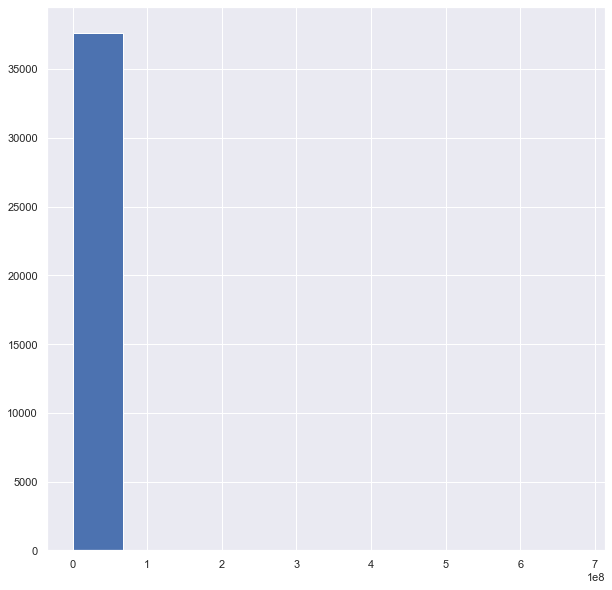

In [137]:
#Observing Mileage values of dataset
plt.figure(figsize=[10,10])
plt.hist(x=df_train["Mileage"])
# plt.xlabel()
plt.show()

<AxesSubplot:xlabel='Mileage'>

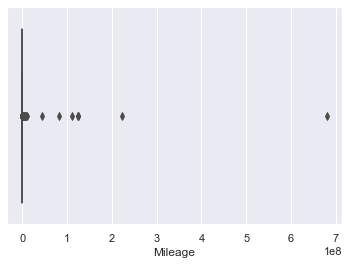

In [138]:
sns.boxplot(x=df_train["Mileage"])

In [139]:
df_train["Mileage"].describe()

count    3.765400e+04
mean     1.021099e+05
std      3.919212e+06
min      0.000000e+00
25%      3.000000e+04
50%      5.200000e+04
75%      8.000000e+04
max      6.800039e+08
Name: Mileage, dtype: float64

In [140]:
df_train["Mileage"].value_counts()

40000.0    499
65000.0    483
45000.0    474
60000.0    467
30000.0    457
          ... 
25870.0      1
73412.0      1
8663.0       1
26458.0      1
78580.0      1
Name: Mileage, Length: 5662, dtype: int64

In [141]:
#Max threshold: 300000
#Min threshold: 50

In [142]:
df_t=threshold_filter("Mileage",df_train,50,300000)

In [143]:
df_train.shape

(37654, 20)

In [144]:
df_t.shape

(37090, 20)

In [145]:
df_train=df_t

### Seller Type

In [146]:
pd.unique(df_train["Seller_type"])

array(['Premium-Member', 'Member'], dtype=object)

In [147]:
#Using LabelEncoding
df_train.Seller_type.replace(['Member', 'Premium-Member'],[0,1],inplace=True)

In [148]:
# 0 => Member
# 1 => Premium-Member
df_train.sample(2)

,Capacity,Year,Unnamed: 0,Title,Sub_title,Brand,Model,Edition,Condition,Transmission,Body,Fuel,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Price
31673,1798.0,-10,77800,Toyota Prius Sports 2012 for sale,"Posted on 04 Jul 11:50 am, Moratuwa, Colombo",10,Prius,Sports,0,1,5,3,91000.0,"Moratuwa, Colombo",Home used Toyota Prius Hybrid CAB-ÃÃÃ Manuf...,https://ikman.lk/en/ad/toyota-prius-sports-201...,Amaya Advertising,0,2022-07-04 11:50:00,5395000
36165,1000.0,-2,88752,Toyota Passo Safety 2020 for sale,"Posted on 29 Aug 7:31 pm, Kotte, Colombo",10,Passo,Safety,0,1,3,1,15000.0,"Kotte, Colombo",Toyota PassoYear of Registration 2020 / JulyYe...,https://ikman.lk/en/ad/toyota-passo-safety-202...,Montfort,0,2022-08-29 19:31:00,8475000


In [149]:
df_train.isnull().sum()

Capacity              0
Year                  0
Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 0
Edition           19848
Condition             0
Transmission          0
Body                  0
Fuel                  0
Mileage               0
Location              0
Description        6182
Post_URL              0
Seller_name          20
Seller_type           0
published_date        0
Price                 0
dtype: int64

### Model

In [150]:
def filter_valuexfrequency_dict(my_dict,threshold):
    filtered_values=np.array([])
    for i in my_dict:
        if my_dict.get(i) >= threshold:
            filtered_values=np.append(filtered_values,i)
    return filtered_values

In [151]:
my_dict=valuexfrequency_dict(pd.unique(df_train["Model"]),df_train["Model"])

In [152]:
my_dict

{'X2': 58,
 'Panda': 656,
 'VITZ': 44,
 'Vezel': 1187,
 'Fz-s Version 3.0': 2,
 'Insight': 108,
 'Scooty Streak': 65,
 'Aqua': 1688,
 'Wego': 220,
 'CT-100': 434,
 'Alto': 2143,
 'Vitz': 1916,
 'MX 7': 76,
 'Allion': 306,
 'Wagon R FX': 627,
 'Re 205': 56,
 'Wagon R FZ': 834,
 'Prius': 1097,
 '520d': 309,
 'Premio G Superior': 131,
 'NTORQ': 59,
 'WAGON R FZ': 58,
 'Fit': 846,
 'Swift': 321,
 'Premio': 1422,
 'AXIO WXB': 12,
 'Trend': 34,
 'Attrage': 18,
 'Indica': 51,
 'Hustler': 190,
 'Wagon R Stingray': 1742,
 'Dio': 1228,
 'Spacia': 520,
 'Premio G superior': 5,
 '740Le': 105,
 'Panda LC': 12,
 'FIT GP5 S GRADE': 6,
 'Grace': 437,
 'ALTO 800': 11,
 'CRV': 301,
 'Wagon R': 984,
 'Nano': 298,
 'Burgman': 77,
 'CLA 180': 54,
 'Apache RTR': 38,
 'King': 69,
 'Harrier': 136,
 'X25': 11,
 'Fz': 103,
 'Tw': 14,
 'Hornet': 37,
 'Passo': 237,
 'RE': 501,
 'Montero': 162,
 'Ntorq': 131,
 'Alto K10': 93,
 'Celerio': 385,
 'NAVI': 6,
 'i8': 7,
 'BAIC': 32,
 'Pixis': 41,
 'X-Trail': 310,
 'E300

In [153]:
def filter_valuexfrequency_dict(my_dict,threshold):
    filtered_values=np.array([])
    for i in my_dict:
        if my_dict.get(i) >= threshold:
            filtered_values=np.append(filtered_values,i)
    return filtered_values

In [154]:
filtered_values=filter_valuexfrequency_dict(my_dict,100)

In [155]:
filtered_values

array(['Panda', 'Vezel', 'Insight', 'Aqua', 'Wego', 'CT-100', 'Alto',
       'Vitz', 'Allion', 'Wagon R FX', 'Wagon R FZ', 'Prius', '520d',
       'Premio G Superior', 'Fit', 'Swift', 'Premio', 'Hustler',
       'Wagon R Stingray', 'Dio', 'Spacia', '740Le', 'Grace', 'CRV',
       'Wagon R', 'Nano', 'Harrier', 'Fz', 'Passo', 'RE', 'Montero',
       'Ntorq', 'Celerio', 'X-Trail', 'E300', 'Axio', 'Civic', 'Platina',
       '318i', 'CHR', 'Ray ZR', 'C200', '4 Stroke', 'X1', 'Pulsar 135',
       'Pulsar 150', 'Outlander', 'C180', 'Dayz', 'N-Box', 'Pulsar',
       'FZ-S', 'X5', 'DIO', 'Fit Shuttle', 'Roomy', 'Panda Cross',
       'RE 205', 'Maruti', 'Discover', 'CLA 200'], dtype='<U32')

In [156]:
my_dict=valuexfrequency_dict(filtered_values,df_train["Model"])

In [157]:
my_dict

{'Panda': 656,
 'Vezel': 1187,
 'Insight': 108,
 'Aqua': 1688,
 'Wego': 220,
 'CT-100': 434,
 'Alto': 2143,
 'Vitz': 1916,
 'Allion': 306,
 'Wagon R FX': 627,
 'Wagon R FZ': 834,
 'Prius': 1097,
 '520d': 309,
 'Premio G Superior': 131,
 'Fit': 846,
 'Swift': 321,
 'Premio': 1422,
 'Hustler': 190,
 'Wagon R Stingray': 1742,
 'Dio': 1228,
 'Spacia': 520,
 '740Le': 105,
 'Grace': 437,
 'CRV': 301,
 'Wagon R': 984,
 'Nano': 298,
 'Harrier': 136,
 'Fz': 103,
 'Passo': 237,
 'RE': 501,
 'Montero': 162,
 'Ntorq': 131,
 'Celerio': 385,
 'X-Trail': 310,
 'E300': 106,
 'Axio': 1439,
 'Civic': 303,
 'Platina': 161,
 '318i': 151,
 'CHR': 546,
 'Ray ZR': 147,
 'C200': 258,
 '4 Stroke': 131,
 'X1': 141,
 'Pulsar 135': 196,
 'Pulsar 150': 287,
 'Outlander': 260,
 'C180': 118,
 'Dayz': 150,
 'N-Box': 116,
 'Pulsar': 170,
 'FZ-S': 155,
 'X5': 116,
 'DIO': 108,
 'Fit Shuttle': 107,
 'Roomy': 121,
 'Panda Cross': 189,
 'RE 205': 135,
 'Maruti': 133,
 'Discover': 159,
 'CLA 200': 111}

In [158]:
for i in pd.unique(df_train["Model"]):
    if i in filtered_values:
        pass
    else:
        df_train=df_train[df_train["Model"]!=i]

In [159]:
df_train.reset_index(drop=True,inplace=True)

In [160]:
pd.unique(df_train["Model"])

array(['Panda', 'Vezel', 'Insight', 'Aqua', 'Wego', 'CT-100', 'Alto',
       'Vitz', 'Allion', 'Wagon R FX', 'Wagon R FZ', 'Prius', '520d',
       'Premio G Superior', 'Fit', 'Swift', 'Premio', 'Hustler',
       'Wagon R Stingray', 'Dio', 'Spacia', '740Le', 'Grace', 'CRV',
       'Wagon R', 'Nano', 'Harrier', 'Fz', 'Passo', 'RE', 'Montero',
       'Ntorq', 'Celerio', 'X-Trail', 'E300', 'Axio', 'Civic', 'Platina',
       '318i', 'CHR', 'Ray ZR', 'C200', '4 Stroke', 'X1', 'Pulsar 135',
       'Pulsar 150', 'Outlander', 'C180', 'Dayz', 'N-Box', 'Pulsar',
       'FZ-S', 'X5', 'DIO', 'Fit Shuttle', 'Roomy', 'Panda Cross',
       'RE 205', 'Maruti', 'Discover', 'CLA 200'], dtype=object)

In [161]:
df_train.shape

(28029, 20)

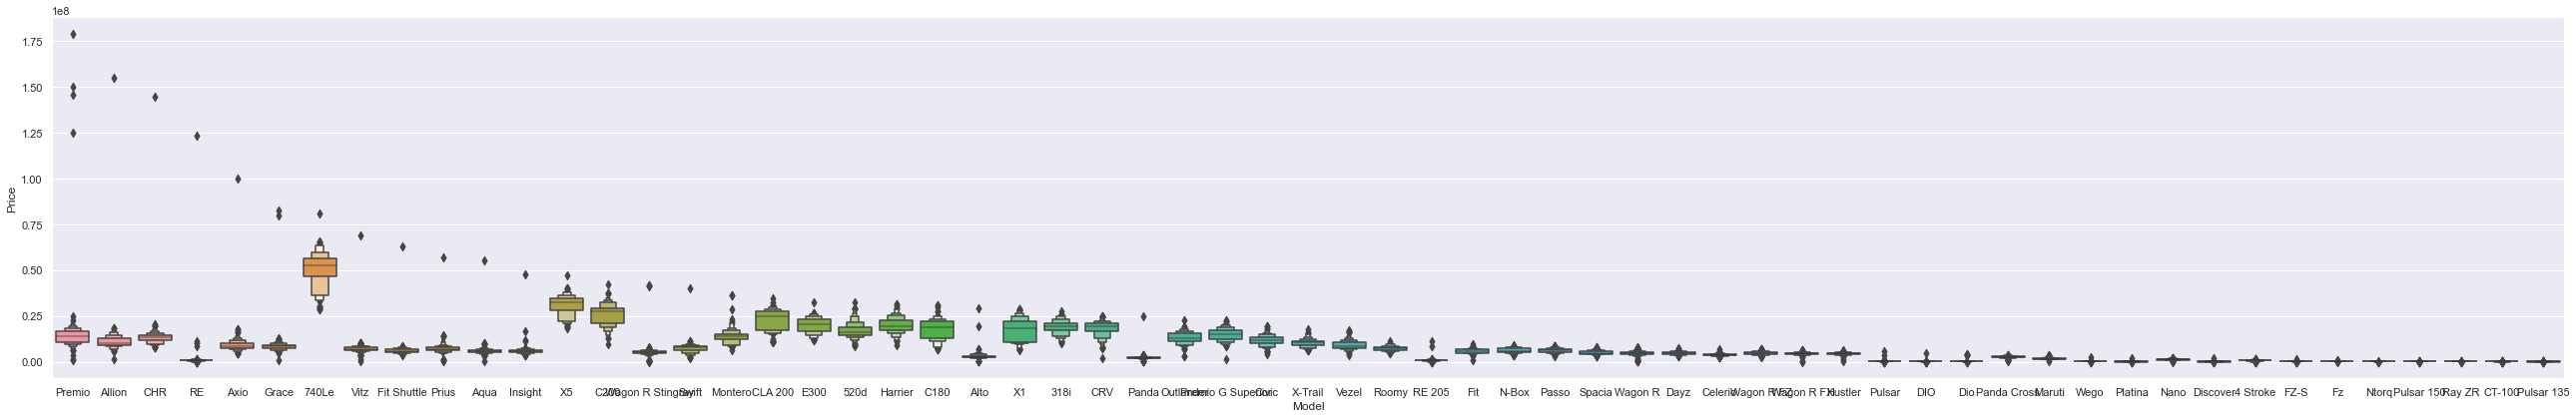

In [162]:
# Seeing a plot between 'Model' and 'Price'
sns.catplot(x="Model",y="Price",data=df_train.sort_values("Price",ascending=False),
           kind="boxen",height=6,aspect=6)

In [163]:
# Arranging the categories of Model variable in the increasing order of median price
#Technique of label encoding: Find the median value of price for each categorical value of model

In [164]:
def auto_accurate_label_encoding_reg(data_frame,column,label):
    my_dict=dict()
    j=1
    for i in pd.unique(data_frame[column]):
        df_i=df_train[label].loc[df_train[column]==i]
        i_median=df_i.median()
        my_dict.update({i:i_median+j})
        j=j+0.001
    median_price=np.array([])
    for i in my_dict:
        median_price=np.append(median_price,my_dict.get(i))
    median_price.sort()
    def get_key(val,dictionary):
        for key, value in dictionary.items():
            if val == value:
                return key
    v=1
    for i in median_price:
        data_frame[column].replace(get_key(i,my_dict),v,inplace=True)
        v=v+1
    return data_frame

In [165]:
df_train=auto_accurate_label_encoding_reg(df_train,"Model","Price")

In [166]:
pd.unique(df_train["Model"])

array([19, 41, 30, 32,  5,  4, 21, 37, 43, 24, 28, 36, 51, 50, 31, 39, 49,
       23, 29,  7, 27, 61, 40, 54, 25, 17, 55, 12, 35, 16, 48, 11, 22, 44,
       57, 42, 45,  3, 56, 47,  8, 59, 15, 52,  2,  9, 46, 53, 26, 33,  6,
       13, 60, 10, 34, 38, 20, 14, 18,  1, 58], dtype=int64)

### Location

In [167]:
# my_location_dict=valuexfrequency_dict(pd.unique(df_train["Location"]),df_train["Location"])

In [168]:
# my_dict

In [169]:
# frequency_array=np.array([])
# for i in my_dict:
#     frequency_array=np.append(frequency_arr,my_dict.get(i))
# frequency_array.sort()
# frequency_array

In [170]:
# #Choosing a threshold of 100 frequency
# location_filtered=filter_valuexfrequency_dict(my_location_dict,100)
# for i in pd.unique(df_train["Location"]):
#     if i not in location_filtered:
#         df_train.drop(df_train.loc[df_train["Location"]==i].index,inplace=True)

In [171]:
# df_train.shape

In [172]:
# len(pd.unique(df_train["Location"]))

In [173]:
#Removing location variable

### Scaling Down all numeric columns

In [174]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xyz=sc.fit_transform(df_train[["Price","Capacity","Mileage",]])

In [175]:
xyz

array([[-0.71654503, -0.06879293,  0.91096683],
       [ 0.17636477,  0.825314  ,  2.34389643],
       [-0.17335824,  0.46767123, -0.13617404],
       ...,
       [-1.02385482, -1.58877471, -1.10064588],
       [-0.9732566 , -0.69466778,  0.7456288 ],
       [-0.00965811,  0.825314  ,  1.02119218]])

In [176]:
df_scaled_columns=pd.DataFrame()
df_scaled_columns= pd.DataFrame(xyz, columns = ["Price","Capacity","Mileage",])
df_scaled_columns

,Price,Capacity,Mileage
0,-0.716545,-0.068793,0.910967
1,0.176365,0.825314,2.343896
2,-0.173358,0.467671,-0.136174
3,-0.210563,0.825314,1.434537
4,-1.002723,-1.660303,-0.962864
...,...,...,...
28024,0.165203,1.361778,0.387396
28025,-0.322177,-0.694668,1.406981
28026,-1.023855,-1.588775,-1.100646
28027,-0.973257,-0.694668,0.745629


In [177]:
df_train=df_train.drop(["Price","Capacity","Mileage"],axis=1)

In [178]:
df_train.isnull().sum()

Year                  0
Unnamed: 0            0
Title                 0
Sub_title             0
Brand                 0
Model                 0
Edition           12849
Condition             0
Transmission          0
Body                  0
Fuel                  0
Location              0
Description        3499
Post_URL              0
Seller_name          15
Seller_type           0
published_date        0
dtype: int64

In [179]:
df_train=pd.concat([df_train,df_scaled_columns],axis=1)

In [180]:
'''

Removing: 'published_date', "Seller_name", "Post_URL", "Description", "Location", "Edition"
            , "Sub_title", "Title", "Unnamed:0",
'''

'\n\nRemoving: \'published_date\', "Seller_name", "Post_URL", "Description", "Location", "Edition"\n            , "Sub_title", "Title", "Unnamed:0",\n'

In [181]:
for i in ['published_date', "Seller_name", "Post_URL", "Description", "Location", "Edition",
           "Sub_title", "Title", 'Unnamed: 0']:
    df_train.drop(i,axis=1,inplace=True)

In [182]:
df_train.shape

(28029, 11)

In [183]:
df_train.head()

,Year,Brand,Model,Condition,Transmission,Body,Fuel,Seller_type,Price,Capacity,Mileage
0,-8,5,19,0,0,4,1,0,-0.716545,-0.068793,0.910967
1,-8,9,41,0,1,6,3,1,0.176365,0.825314,2.343896
2,-11,9,30,0,1,4,1,0,-0.173358,0.467671,-0.136174
3,-10,10,32,0,1,3,3,0,-0.210563,0.825314,1.434537
4,-7,1,5,0,1,1,1,0,-1.002723,-1.660303,-0.962864


## Feature Selection

### pearson correlation

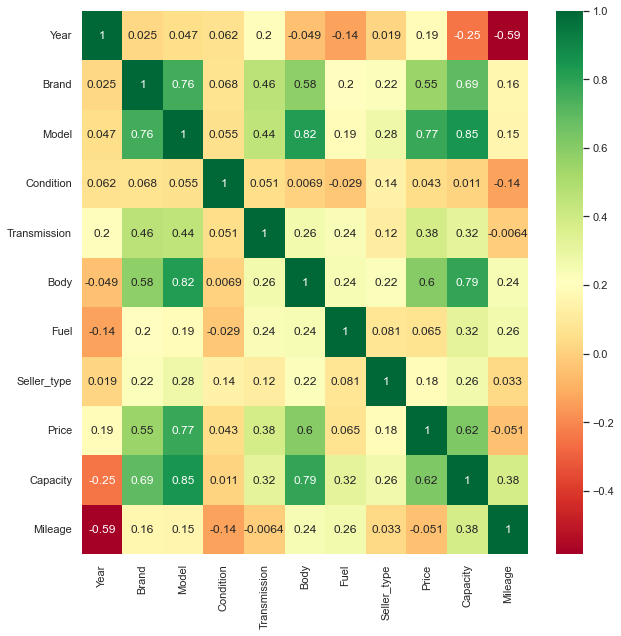

In [184]:
#First using pearson correlation
plt.figure(figsize=[10,10])
correlation_matrix=df_train.corr()
sns.heatmap(correlation_matrix,annot=True,cmap = "RdYlGn")
plt.show()

In [185]:
#After manually observing:
'''
85% and above coorelated pairs:["Model","Capacity"]
'''

'\n85% and above coorelated pairs:["Model","Capacity"]\n'

In [186]:
# Deleting "Model" variable
df_train.drop("Model",axis=1,inplace=True)

### Feature Importance

In [187]:
df_train.columns

Index(['Year', 'Brand', 'Condition', 'Transmission', 'Body', 'Fuel',
       'Seller_type', 'Price', 'Capacity', 'Mileage'],
      dtype='object')

In [188]:
df_train=df_train[['Year', 'Brand', 'Condition', 'Transmission', 'Body', 'Fuel',
       'Seller_type', 'Capacity', 'Mileage', 'Price']]

In [189]:
x=df_train.iloc[:,0:-1].values
Y=df_train.iloc[:,-1].values

In [190]:
# Now using feature importance
from sklearn.ensemble import ExtraTreesRegressor
ETC=ExtraTreesRegressor()
ETC.fit(x,Y)

ExtraTreesRegressor()

In [191]:
ETC.feature_importances_

array([0.11595144, 0.25473185, 0.0018089 , 0.02672783, 0.19768538,
       0.02966238, 0.00844581, 0.23347663, 0.13150977])

In [192]:
ETC_FI=pd.Series(ETC.feature_importances_,index=['Year', 'Brand', 'Condition', 
        'Transmission', 'Body', 'Fuel','Seller_type', 'Capacity', 'Mileage'])
ETC_FI=ETC_FI.sort_values()

In [193]:
ETC_FI

Condition       0.001809
Seller_type     0.008446
Transmission    0.026728
Fuel            0.029662
Year            0.115951
Mileage         0.131510
Body            0.197685
Capacity        0.233477
Brand           0.254732
dtype: float64

In [194]:
#Plotting a graphical representation

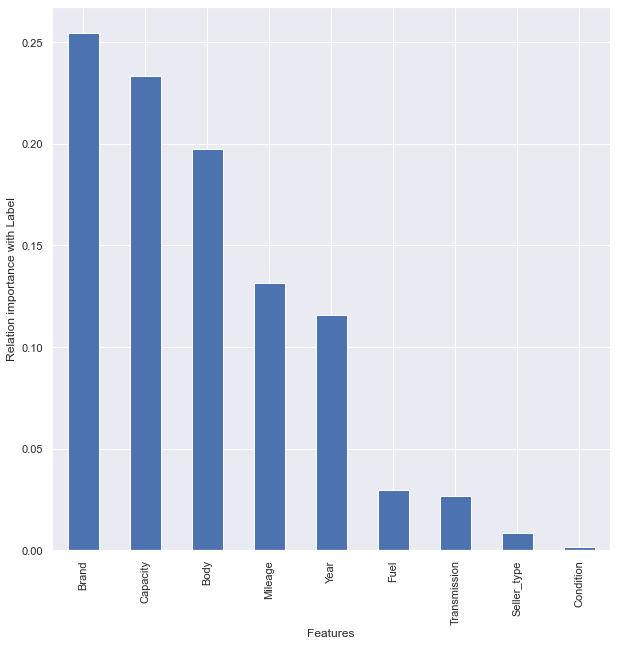

In [195]:
plt.figure(figsize=[10,10])
ETC_FI.nlargest(9).plot(kind="bar")
plt.xlabel("Features")
plt.ylabel("Relation importance with Label")
plt.show()

In [196]:
# Deleting 'Seller_type' and 'Condition'
df_train.drop(["Seller_type","Condition"],axis=1,inplace=True)

## Modal Building

In [197]:
df_train.head()

,Year,Brand,Transmission,Body,Fuel,Capacity,Mileage,Price
0,-8,5,0,4,1,-0.068793,0.910967,-0.716545
1,-8,9,1,6,3,0.825314,2.343896,0.176365
2,-11,9,1,4,1,0.467671,-0.136174,-0.173358
3,-10,10,1,3,3,0.825314,1.434537,-0.210563
4,-7,1,1,1,1,-1.660303,-0.962864,-1.002723


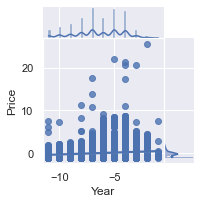

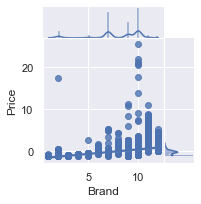

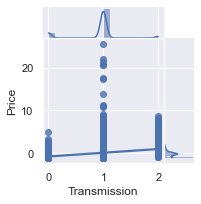

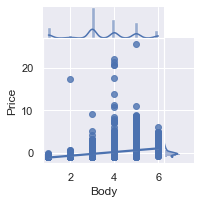

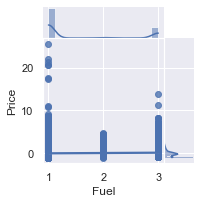

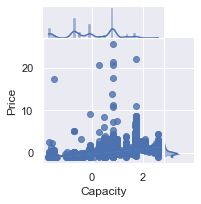

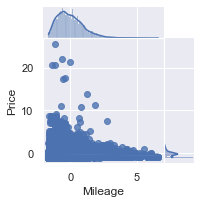

In [198]:
#jointplot
a=sns.jointplot(x="Year",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)
b=sns.jointplot(x="Brand",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)
c=sns.jointplot(x="Transmission",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)
d=sns.jointplot(x="Body",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)
e=sns.jointplot(x="Fuel",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)
f=sns.jointplot(x="Capacity",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)
g=sns.jointplot(x="Mileage",y="Price",data=df_train,kind="reg",space=0,height=3,ratio=4)

plt.show(a)
plt.show(b)
plt.show(c)
plt.show(d)
plt.show(e)
plt.show(f)
plt.show(g)

In [199]:
df_train.columns

Index(['Year', 'Brand', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Price'],
      dtype='object')

In [201]:
# sns.pairplot(df_train,kind="reg")

In [202]:
#Going for XGBoost Regressor

In [203]:
x=df_train.iloc[:,0:-1].values
Y=df_train.iloc[:,-1].values

In [204]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(verbosity=1)
xgbr.fit(x,Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Bias

In [205]:
training_prediction=xgbr.predict(x)

In [206]:
MAE = metrics.mean_absolute_error(Y, training_prediction)
MSE = metrics.mean_squared_error(Y, training_prediction)
RMSE = np.sqrt(MSE)
print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root mean squared error:",RMSE)

Mean absolute error: 0.13565407372127142
Mean squared error: 0.09694451649635438
Root mean squared error: 0.311359143909978


### Variance

In [207]:
df_test=pd.read_csv("vehicle_testdata_preprocessed.csv")
df_test=df_test[['Year', 'Brand', 'Transmission', 'Body', 'Fuel', 'Capacity', 'Mileage',
       'Price']]

In [208]:
x_test=df_test.iloc[:,0:-1].values
Y_test=df_test.iloc[:,-1].values

In [209]:
test_prediction=xgbr.predict(x_test)

In [210]:
MAE = metrics.mean_absolute_error(Y, training_prediction)
MSE = metrics.mean_squared_error(Y, training_prediction)
RMSE = np.sqrt(MSE)
print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root mean squared error:",RMSE)

Mean absolute error: 0.13565407372127142
Mean squared error: 0.09694451649635438
Root mean squared error: 0.311359143909978


In [ ]:
''' As my model is already giving an extremely high level of accuracy it doesn't require hyperparameter
tuning. As it could result in overfitting'''

In [211]:
#Model is complete

In [212]:
import pickle
f=open("SriLanka_vehicle_price_Model","wb")
pickle.dump(xgbr,f)
f.close()